<a href="https://colab.research.google.com/github/dashadrgna/dashadrgna/blob/master/Deryagina_L8_2_NLP_Morpho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
text = "Once she stopped for a moment and stood still while a tear or two ran down her face."

In [3]:
tokens = nltk.word_tokenize(text)

In [4]:
tokens

['Once',
 'she',
 'stopped',
 'for',
 'a',
 'moment',
 'and',
 'stood',
 'still',
 'while',
 'a',
 'tear',
 'or',
 'two',
 'ran',
 'down',
 'her',
 'face',
 '.']

# Морфологическая разметка

In [5]:
nltk.download('averaged_perceptron_tagger')
morph_tags = nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [6]:
morph_tags

[('Once', 'RB'),
 ('she', 'PRP'),
 ('stopped', 'VBD'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('moment', 'NN'),
 ('and', 'CC'),
 ('stood', 'VBD'),
 ('still', 'RB'),
 ('while', 'IN'),
 ('a', 'DT'),
 ('tear', 'JJ'),
 ('or', 'CC'),
 ('two', 'CD'),
 ('ran', 'VBP'),
 ('down', 'IN'),
 ('her', 'PRP$'),
 ('face', 'NN'),
 ('.', '.')]

In [7]:
type(morph_tags)

list

In [8]:
type(morph_tags[0])

tuple

In [9]:
morph_tags[0][0]

'Once'

In [10]:
morph_tags[0][1]

'RB'

In [11]:
for i in morph_tags:
  print(i[1])

RB
PRP
VBD
IN
DT
NN
CC
VBD
RB
IN
DT
JJ
CC
CD
VBP
IN
PRP$
NN
.


**Кортеж** (tuple) – это неизменяемый список.

Отличительные особенности:
- кортеж защищен от изменений – как намеренных (что плохо), так и случайных (что хорошо);
- кортеж меньше списка по размеру.

In [12]:
for word, tag in morph_tags:
  print(tag)

RB
PRP
VBD
IN
DT
NN
CC
VBD
RB
IN
DT
JJ
CC
CD
VBP
IN
PRP$
NN
.


[Penn Treebank Project](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)

In [13]:
nltk.download('tagsets')
nltk.help.upenn_tagset()

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je j

## Русский язык

In [14]:
ru_text = "Она посмотрела на себя в зеркало долгим, внимательным и критическим взглядом."

In [15]:
ru_tokens = nltk.word_tokenize(ru_text, language='russian')

In [16]:
ru_tokens

['Она',
 'посмотрела',
 'на',
 'себя',
 'в',
 'зеркало',
 'долгим',
 ',',
 'внимательным',
 'и',
 'критическим',
 'взглядом',
 '.']

In [17]:
nltk.download('averaged_perceptron_tagger_ru')
morph_tags = nltk.pos_tag(ru_tokens, lang='rus')

[nltk_data] Downloading package averaged_perceptron_tagger_ru to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_ru.zip.


In [18]:
morph_tags

[('Она', 'S-PRO'),
 ('посмотрела', 'V'),
 ('на', 'PR'),
 ('себя', 'S-PRO=acc'),
 ('в', 'PR'),
 ('зеркало', 'S'),
 ('долгим', 'A=m'),
 (',', 'NONLEX'),
 ('внимательным', 'A=m'),
 ('и', 'CONJ'),
 ('критическим', 'A=m'),
 ('взглядом', 'S'),
 ('.', 'NONLEX')]

[Russian National Corpus tagset](https://ruscorpora.ru/old/en/corpora-morph.html)

# Синтаксический анализ

In [19]:
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.
!apt install ghostscript python3-tk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 784 kB of archives.
After this operation, 2,271 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.10 [784 kB]
Fetched 784 kB in 1s (959 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 155629 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.10_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.10) ...
Setting up xvfb (2:1.19.6-1ubuntu4.10) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Reading package lists... Done
Building dependency tree       
Reading state informat

In [20]:
from nltk.tree import Tree
chunked_sentence = '(S (NP this tree) (VP (V is) (AdjP pretty)))'
tree = Tree.fromstring(chunked_sentence)

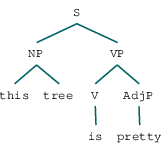

In [21]:
tree

In [22]:
t = Tree.fromstring("(S (NP I) (VP (V saw) (NP him)))")

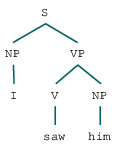

In [23]:
t

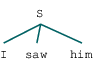

In [24]:
t.flatten()

In [25]:
print(t.flatten())

(S I saw him)


In [26]:
from nltk import CFG

grammar = CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> 'the' N | N PP | 'the' N PP
VP -> V NP | V PP | V NP PP
N -> 'cat'
N -> 'dog'
N -> 'rug'
V -> 'chased'
V -> 'sat'
P -> 'in'
P -> 'on'
""")

In [27]:
from nltk.parse import RecursiveDescentParser

rd = RecursiveDescentParser(grammar)

In [28]:
sent = 'the cat chased the dog'.split()
for t in rd.parse(sent):
  print(t)
  res = t

(S (NP the (N cat)) (VP (V chased) (NP the (N dog))))


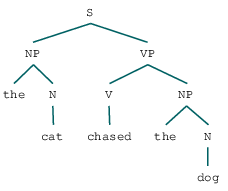

In [29]:
res